# Vjezbe 2 - 11.03.2024.

* Preuzeti slike sa Merlina.
* Kreirati mapu na Google driveu i u nju prebaciti slika.jpg i Leptir.jpg
* slika2.jpg spremiti na računalo

##Pomoć - Code snippets

Pomoć -> Iscječci koda za pretraživanje

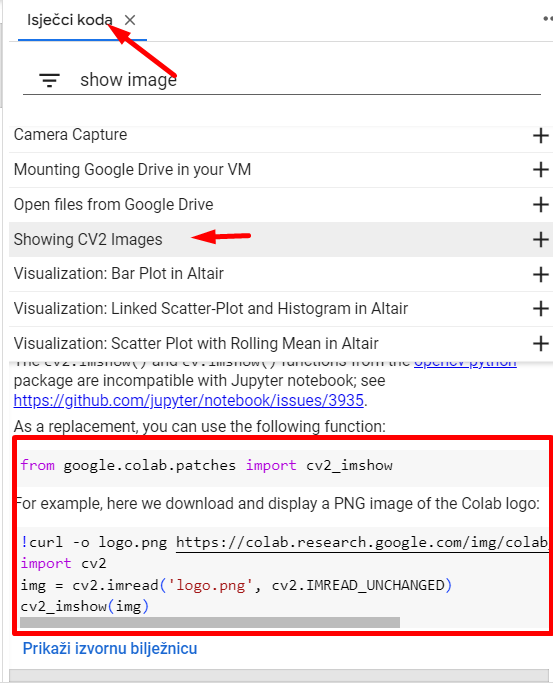

##Sistemske naredbe

Kada želimo sistemske naredbe, koje nisu pisane u pythonu, moramo pisati '**!**' ispred naredbe

In [1]:
!python --version

Python 3.10.12


In [2]:
!pip install pycuda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 9.1 MB/s eta 0:00:00
  Created wheel for pycuda: filename=pycuda-2024.1-cp310-cp310-linux_x86_64.whl size=661204 sha256=b9a07c1d6f0aea6e0f8010a1b047c2abac087360d85ad950a86eafd40d556166
  Stored in directory: /root/.cache/pip/wheels/12/34/d2/9a349255a4eca3a486d82c79d21e138ce2ccd90f414d9d72b8
Successfully built pycuda


##Pisanje koda u pythonu

Isprobajmo zbroj dva broja  - pišemo python kod, ne koristimo '!'

In [ ]:
a=10
b=20
a+b

Pomoću for petlje izračunajte zbroj brojeva od 1 do 5

In [ ]:
zbroj=0
for x in range(1,6):
  zbroj=zbroj+x
zbroj

Pomoću if-else: ako je zbroj jednak 15, ispisi "rezultat je točan", ako ne "for petlja nije dobro napisana"

In [ ]:
if zbroj==15:
  print("Rezultat je točan")
else:
  print("For petlja nije dobro napisana")


##Povezivanje na drive

Za koristiti datoteke koje imamo na disku moramo omogućiti korištenje google drivea.

**Putem koda:**

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Ili u lijevom kutu odabirom ikone**:


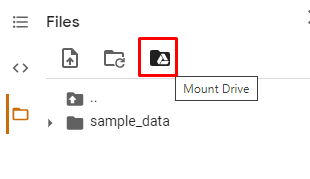


##Biblioteke - učitavanje

In [8]:
from PIL import Image
from matplotlib import pyplot as plt

##Rad sa slikama

In [80]:
putanja_slike='/content/drive/MyDrive/ML/slika.jpg'

In [81]:
#za učitavanje slike potrebna nam je neka od biblioteka  npr. od openCV - cv2 ili Pillow

from PIL import Image
slika=Image.open(putanja_slike)
print("Visina i širina slike iznose{}, vrsta slike: {}".format(slika.size, slika.mode))


Visina i širina slike iznose(225, 225), vrsta slike: RGB


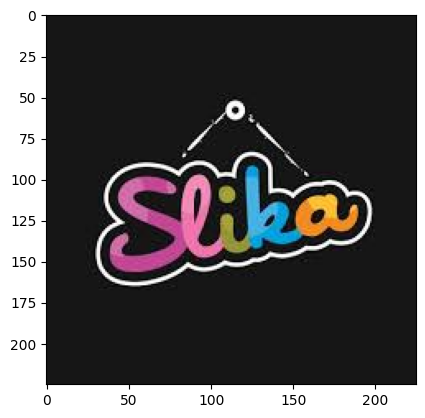

In [12]:
#za prikaz slika koristiti ćemo matplotlib ,jer od PIL-a i cv2 imshow ne radi u Google Collabu, ali radi lokalno na računalu!
from matplotlib import pyplot as plt
plt.imshow(slika)

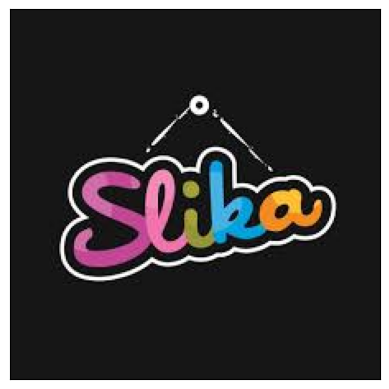

In [13]:
#ako ne želimo da nam se prikazuju x i y os nego samo slika
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.imshow(slika)

###Modifikacije slika

Rotirajmo sliku za 45 stupnjeva

In [79]:
rotirana=slika.rotate(45)
plt.xticks([])
plt.yticks([])
plt.imshow(rotirana)

AttributeError: 'numpy.ndarray' object has no attribute 'rotate'

Promijeniti RGB u Grayscale

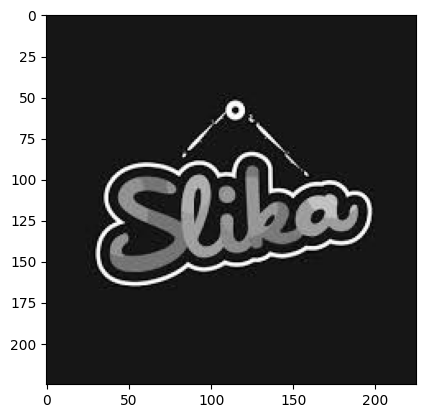

In [25]:
siva=slika.convert('LA')
plt.imshow(siva)

Spremanje slike na disk, koristimo gotove biblioteke. može od Pillowa, open CV-a


In [16]:
#spremanje koristeći biblioteku Pillow
rotirana.save("/content/drive/MyDrive/ML/rotirana_slika.jpg")

Primjer uplod slike sa računala (slika je uplodana samo dok sesija traje, uvijek bolje podatke spremiti na disk)


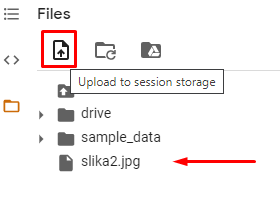


Pomoću OpenCV učitat sliku učitanu sa računala u sesiju i spremit na Google Drive


In [26]:
import cv2
#ucitavaje slike
racunalo=cv2.imread('/content/slika2.jpg')
#spremanje na drive
cv2.imwrite('/content/drive/MyDrive/ML/slika_sa_racunala.jpg', racunalo)

True

ROI- Region of interest

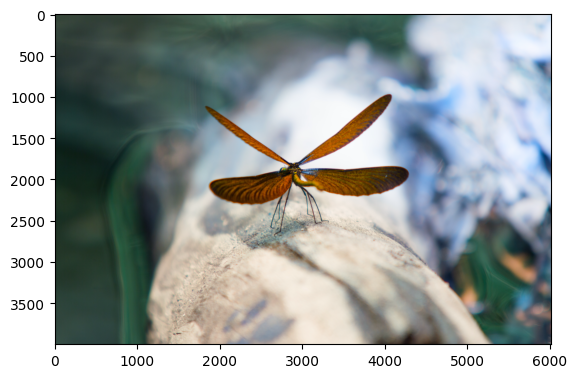

In [28]:
import cv2
#ucitavanje slike
slika_leptira= cv2.imread('/content/drive/MyDrive/ML/Leptir.jpg')
plt.imshow(slika_leptira)


(1700, 2570, 3)

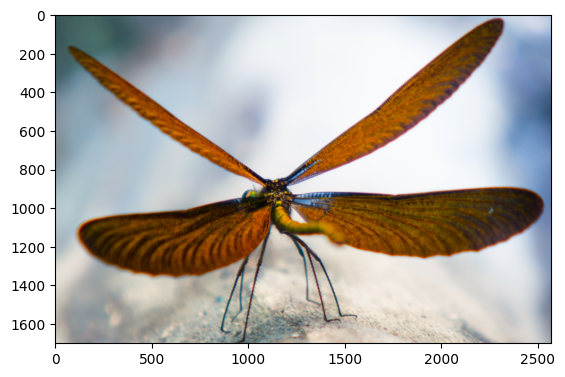

In [32]:
#odredimo kordinate di nam se nalazi leptir, odnosno odabiremo željene piksele
leptir = slika_leptira[950:2650, 1750:4320]
plt.imshow(leptir)
v,s,d=leptir.shape  # varijable koje možemo koristiti za odabir smanjenih dimenzija leptira
leptir.shape

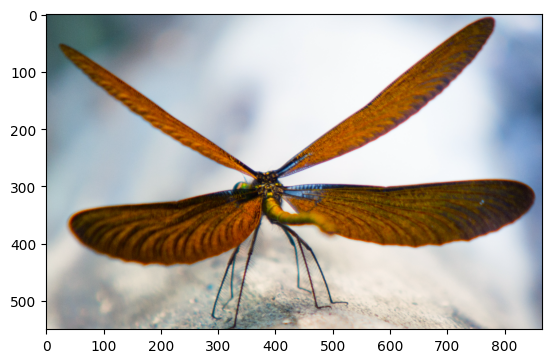

In [33]:
#smanjimo leptira na željene dimenzije (trebaju biti proporcionalne)

mali_leptir=cv2.resize(leptir,(866,550))
plt.imshow(mali_leptir)

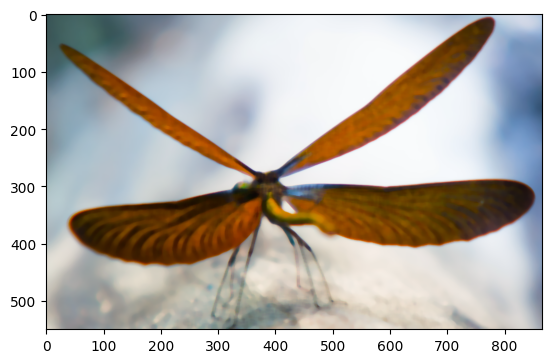

In [37]:
#dodajemo buku u sliku
zamuceni=cv2.medianBlur(mali_leptir, 9) #adding 50% noise
plt.imshow(zamuceni)

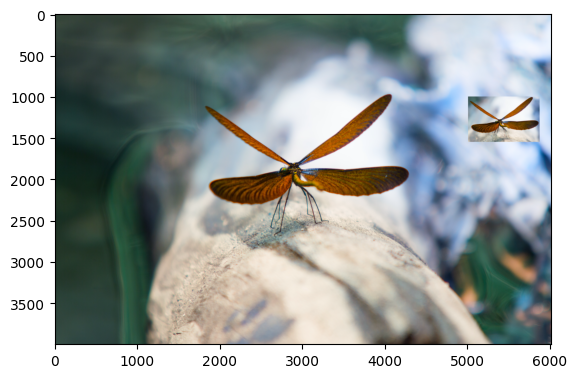

In [38]:
#lijepimo malog zamucenog leptira u originalnu sliku na željenu poziciju
#želimo da navedeni pikseli poprime vrijednost od var zamuceni
slika_leptira[1000:1550, 5000:5866]=zamuceni

plt.imshow(slika_leptira)

##Aktivnost - 3 boda - kreirati novu skriptu i predati na Merlin




* Pomoću sistemske naredbe (ne python) curl preuzmite sliku u boji sa poveznice po vlastitom izboru. Naredbu curl pozivate sa sljedećim parametrima. Prvi parametar je -o, za drugi parametar definirate naziv pod kojim će se spremiti preuzeta sliku u Colab okruženje slika1.jpg i treći parametar je poveznica na sliku.
* Primjeri poveznica:
https://files.readme.io/069a96b-4d870d7-546212389.jpg https://threejsfundamentals.org/threejs/resources/images/flower-2.jpg

*	Pomoću OpenCV biblioteke (cv2) učitajte sliku i prikažite njen oblik. Koliko iznose njena visina, širina i dubina? Visina______; širina_______; dubina__________.

*	Prikažite sliku. Za prikaz slike koristite naredbu cv2_imshow iz biblioteke google.colab.patches.

*	Promijenite vrijednosti piksela na poziciji (130,130). Prvo dohvatite piksel na slici i ispišite vrijednost. Prva vrijednost predstavlja plavi piksel, druga zeleni i treća crveni. Ako 0 predstavlja crnu boju, a 255 bijelu boju, promijenite vrijednosti piksela tako da sada vrijednost bude bijela.  Također piksele na pozicijama (100:120,105:110) promijenite da budu ljubičasti. Da dobijete ljubičaste piksele koje dvije boje ćete kombinirati? Razmislite i primijenite. Prikažite sliku sa promijenjenim pikselima.

*	Kreirajte novu sliku (npr. slika2) tako da promijenite dimenzije prethodne slike tako da visina bude duplo manja, a širina duplo veća, te pretvorite sliku u sive tonove. Prikažite oblik slike i dobivenu sliku.


In [44]:
!curl -o slika1.jpg "https://files.readme.io/069a96b-4d870d7-546212389.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  119k  100  119k    0     0   589k      0 --:--:-- --:--:-- --:--:--  588k


In [45]:
import cv2

In [82]:
slika = cv2.imread("/content/slika1.jpg")
slika.shape

(512, 512, 3)

In [83]:
print("Visina: {}, sirina: {}, dubina: {}".format(slika.shape[0], slika.shape[1], slika.shape[2]))

Visina: 512, sirina: 512, dubina: 3


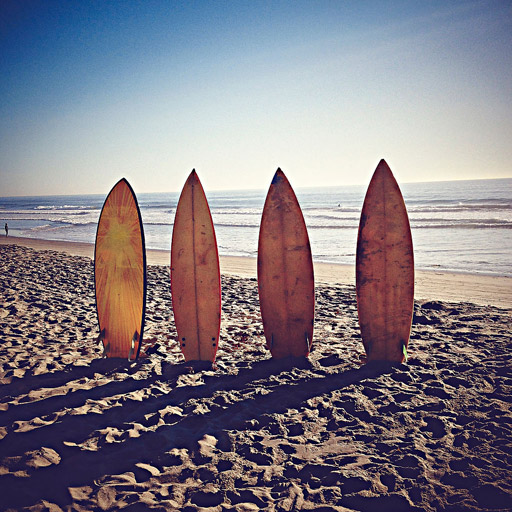

In [84]:
from google.colab.patches import cv2_imshow

cv2_imshow(slika)

In [85]:
slika[130][130] = [255, 255, 255]

In [86]:
slika[100:320][105:310] = [132, 23, 25]

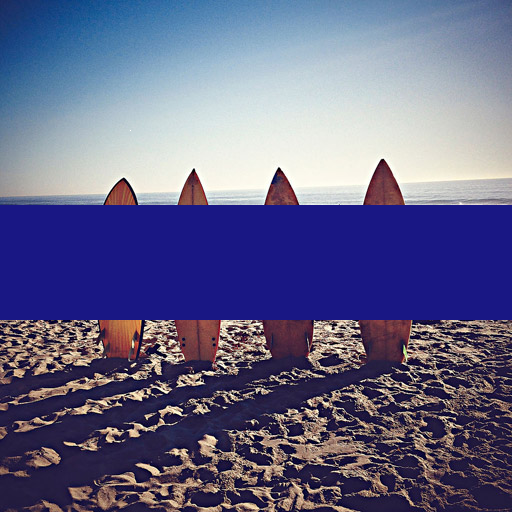

In [87]:
cv2_imshow(slika)

In [88]:
x = slika.shape[0] * 2
y = int((slika.shape[1]) / 2)
slika2 = cv2.resize(slika, (x, y))

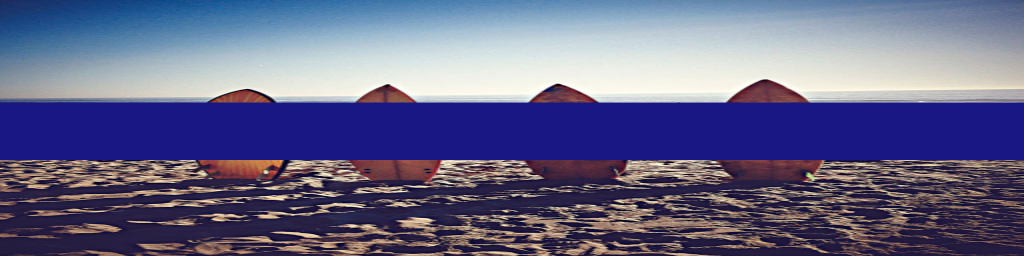

AttributeError: 'numpy.ndarray' object has no attribute 'read'

In [91]:
cv2_imshow(slika2)

##Pisanje u datoteku

**Code snippets:** Downloading files to your local file system

* files.download will invoke a browser download of the file to your local computer.

In [92]:
# code snippet
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')  #za preuzimanje na računalo

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Spremanje na google drive

Potrebno povezivanje na disk ako nije od prije

In [94]:
with open('/content/drive/MyDrive/ML/datoteka.txt', 'w') as f:
  f.write('Primjer pisanja u datoteku')


## Učitavanje datoteka sa računala



**code snippets:** Open files from your local file system

* `files.upload` returns a dictionary of the files which were uploaded.
* The dictionary is keyed by the file name and values are the data which were uploaded.

In [95]:
#code snippets

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving example.txt to example (1).txt
User uploaded file "example (1).txt" with length 12 bytes


In [96]:
#prikazati u MB duzinu
from google.colab import files
ucitaj = files.upload()  #možemo učitati više datoteka
for datoteka in ucitaj.keys():
  velicina_datoteke=len(ucitaj[datoteka])
  velicina_MB='{0:.2f}'.format(velicina_datoteke/(10**6))
  #format na 2 decimale

  print('Korisnik je je učitao datoteku "{}" dužine {} bajta, odnosno {} MB'.
        format(datoteka, velicina_datoteke, velicina_MB ))

Saving 069a96b-4d870d7-546212389.jpg to 069a96b-4d870d7-546212389.jpg
Korisnik je je učitao datoteku "069a96b-4d870d7-546212389.jpg" dužine 122382 bajta, odnosno 0.12 MB


In [97]:
ucitaj  #izgled rijecnika: naziv datoteke i spremljeni podaci
#'xxxc.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xc8\x00\x00\x01T\x08\x06\x00\x00\x00\xa0\x05\xac\xd2\x00\x00\x00\tpHYs\x00\x00\x0b\x13\x00\x00\x0b\x13\x01\x00\x9a\x9c\x18\x00\x00\n5iCCPPhotoshop ICC

{'069a96b-4d870d7-546212389.jpg': b'\xff\xd8\xff\xe1\x00\x18Exif\x00\x00II*\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xec\x00\x11Ducky\x00\x01\x00\x04\x00\x00\x00F\x00\x00\xff\xe1\x04Zhttp://ns.adobe.com/xap/1.0/\x00<?xpacket begin="\xef\xbb\xbf" id="W5M0MpCehiHzreSzNTczkc9d"?> <x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="Adobe XMP Core 5.6-c138 79.159824, 2016/09/14-01:09:01        "> <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"> <rdf:Description rdf:about="" xmlns:xmpRights="http://ns.adobe.com/xap/1.0/rights/" xmlns:xmpMM="http://ns.adobe.com/xap/1.0/mm/" xmlns:stRef="http://ns.adobe.com/xap/1.0/sType/ResourceRef#" xmlns:xmp="http://ns.adobe.com/xap/1.0/" xmlns:dc="http://purl.org/dc/elements/1.1/" xmpRights:WebStatement="http://www.gettyimages.com" xmpMM:DocumentID="xmp.did:131642FEE9E811E7AA45B366B3F5A5B0" xmpMM:InstanceID="xmp.iid:131642FDE9E811E7AA45B366B3F5A5B0" xmp:CreatorTool="Adobe Photoshop CS5 Macintosh"> <xmpMM:DerivedFrom stRef:instanceI

## Spremanje datoteke na računalo



`files.download` will invoke a browser download of the file to your local computer.

In [ ]:
from google.colab import files
#isto kao i za na disk, spremanje npr. tekstualne datoteke na racunalo
with open('rjecnik.txt', 'w') as f:
  f.write(str(ucitaj))  #pretvorimo u string da mozemo spremiti vrijednost
                  #mozemo koristiti i repr funkciju (The repr() function returns
                  #a printable representation of the given object.)

files.download('rjecnik.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Učitavanje podataka iz Githuba

**Code snippets:** Open files from GitHub
To open a file from GitHub, you can clone the repo or fetch the file directly.

If you are trying to access files from a private repo, you must use a GitHub access token.

In [ ]:
# Clone the entire repo.
!git clone -l -s git://github.com/jakevdp/PythonDataScienceHandbook.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
fatal: unable to connect to github.com:
github.com[0: 140.82.113.4]: errno=Connection timed out

[Errno 2] No such file or directory: 'cloned-repo'
/content
app.jpg  drive	example.txt  rjecnik.txt  sample_data  slika.jpg


In [ ]:
# Fetch a single <1MB file using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://api.github.com/repos/jakevdp/PythonDataScienceHandbook/contents/notebooks/data/california_cities.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 59658  100 59658    0     0   385k      0 --:--:-- --:--:-- --:--:--  385k
